In [4]:
#Loading Libs
import matplotlib.pyplot as plt
%matplotlib inline  
import pandas as pd
from math import floor
from ggplot import *
import seaborn as sns

In [2]:
#Initializing Vars
S = 1000
I = 15
R = 0
D = 0
steps = 50
#Disease Parameters
beta = .0005
gamma = .05
delta = .02

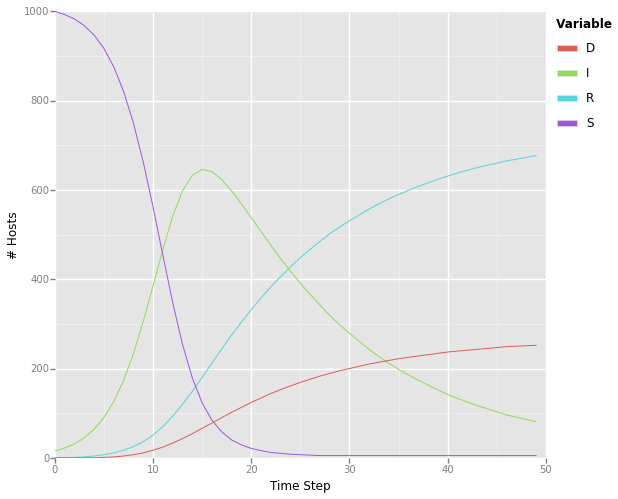

<ggplot: (-9223363267099147285)>

In [3]:
history = pd.DataFrame({"S": S, "I": I, "R": R, "D": D}, index=[0])
#Run sim loop
history["step"] = history.index
plotData = pd.melt(history, id_vars=["step"])
ggplot(plotData, aes(x="step", y="value", color="variable"))+geom_line()
for step in range(1, steps):
    newInf = floor(min(max(beta*I*S, 0), S))
    newRec = floor(min(max(gamma*I, 0), I))
    newDead = floor(min(max(delta*I, 0), I-newRec))
    S = S - newInf
    I = I + newInf - newRec - newDead
    R = R + newRec
    D = D + newDead
    history = history.append(pd.DataFrame({"S": S, "I": I, "R": R, "D": D}, index=[step]))
history["step"] = history.index
plotData = pd.melt(history, id_vars=["step"], value_vars=["S","I","R","D"])
sns.
ggplot(plotData, aes(x="step", y="value", color="variable"))+geom_line()+xlab("Time Step")+ylab("# Hosts")

In [ ]:
history
